# Chapter 5: Getting Started with pandas (42 pages)

* While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.

## 5.1 Introduction to pandas Data Structures
#### Series
* A Series is a `one-dimensional` `array-like object` containing a sequence of values (of similar types to NumPy types) and an associated array of `data labels`, called its `index`
* think about a Series as a `fixed-length`, `ordered dict`, as it is a`mapping of index values to data values`
```
In [26]: sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
In [27]: obj3 = pd.Series(sdata)
In [28]: obj3
Out[28]:
Ohio 35000
Oregon 16000
Texas 71000
Utah 5000
dtype: int64
```
* When you are only passing a dict, the `index` in the resulting Series will have the `dict’s keys in sorted order`. You can override this by passing the dict keys in the order you want them to appear in the resulting Series:
```
In [29]: states = ['California', 'Ohio', 'Oregon', 'Texas']
In [30]: obj4 = pd.Series(sdata, index=states)
In [31]: obj4
Out[31]:
California NaN
Ohio 35000.0
Oregon 16000.0
Texas 71000.0
dtype: float64
```
* The `isnull` and `notnull` functions in pandas should be used to `detect missing data`:
```
In [32]: pd.isnull(obj4)
Out[32]:
California True
Ohio False
Oregon False
Texas False
dtype: bool
In [33]: pd.notnull(obj4)
Out[33]:
California False
Ohio True
Oregon True
Texas True
dtype: bool
```
* A useful Series feature for many applications is that it `automatically aligns by index label in arithmetic operations`
* A Series’s index can be altered in-place by assignment
#### DataFrame
* represents a `rectangular table of data` and contains an `ordered collection of columns`, each of which can be a `different value type` (numeric, string, boolean, etc.). The DataFrame has `both a row and column index`
* Creating a dataframe from a dict of equal-length lists or NumPy arrays:
```
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
```
* The resulting DataFrame will have its index assigned automatically as with Series, and the `columns are placed in sorted order`:
```
In [45]: frame
Out[45]:
pop state year
0 1.5 Ohio 2000
1 1.7 Ohio 2001
2 3.6 Ohio 2002
3 2.4 Nevada 2001
4 2.9 Nevada 2002
5 3.2 Nevada 2003
```
* The `del` keyword will delete columns as with a dict.
```
del frameName['colName']
```
* New columns cannot be created with the `frameName.colName` syntax.
* If the `nested dict` is passed to the DataFrame, pandas will interpret the `outer dict keys as the columns` and the `inner keys as the row indices`:
```
In [65]: pop = {'Nevada': {2001: 2.4, 2002: 2.9},
                'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
In [66]: frame3 = pd.DataFrame(pop)
In [67]: frame3
Out[67]:
    Nevada Ohio
2000 NaN 1.5
2001 2.4 1.7
2002 2.9 3.6
```
* As with Series, the `values attribute` returns the data contained in the DataFrame as a `two-dimensional ndarray`:
```
In [73]: frame3
Out[73]:
state Nevada Ohio
year
2000 NaN 1.5
2001 2.4 1.7
2002 2.9 3.6
In [74]: frame3.values
Out[74]:
array([[ nan, 1.5],
        [ 2.4, 1.7],
        [ 2.9, 3.6]])
```
* If the DataFrame’s columns are `different dtypes`, the dtype of the values array will be chosen to accommodate all of the columns:
```
In [60]: frame2
Out[60]:
year state pop debt
one 2000 Ohio 1.5 NaN
two 2001 Ohio 1.7 -1.2
three 2002 Ohio 3.6 NaN
four 2001 Nevada 2.4 -1.5
five 2002 Nevada 2.9 -1.7
six 2003 Nevada 3.2 NaN
```
```
In [75]: frame2.values
Out[75]:
array([[2000, 'Ohio', 1.5, nan],
        [2001, 'Ohio', 1.7, -1.2],
        [2002, 'Ohio', 3.6, nan],
        [2001, 'Nevada', 2.4, -1.5],
        [2002, 'Nevada', 2.9, -1.7],
        [2003, 'Nevada', 3.2, nan]], dtype=object)
```
#### Index Objects
* holds the `axis labels` and other metadata (like the `axis name or names`). Any array or other sequence of labels you use when constructing a Series or DataFrame is `internally converted to an Index`
* Index objects are `immutable` and thus can’t be modified by the user
* Unlike Python sets, a pandas `Index` can contain `duplicate labels`
* **Selections with duplicate labels will select all occurrences of that label.**
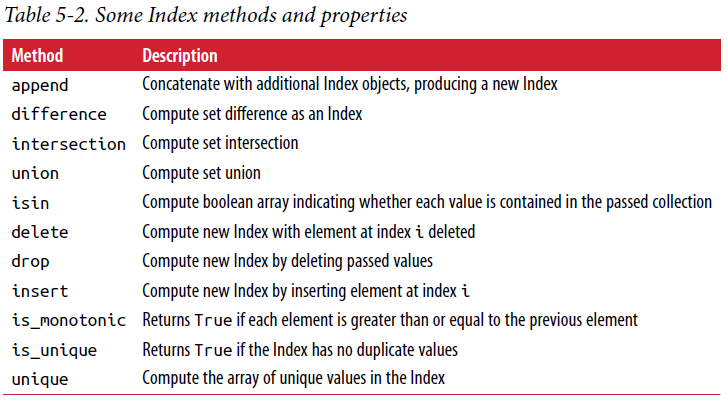

In [1]:
import numpy as np
import pandas as pd

In [4]:
index1 = pd.Index(['a','b','c'])
index1

Index(['a', 'b', 'c'], dtype='object')

In [5]:
index2 = pd.Index(['d','e','f'])
index2

Index(['d', 'e', 'f'], dtype='object')

In [7]:
# append()

appendedIndex = index1.append(index2)
appendedIndex

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [8]:
index3 = pd.Index(['a','c','e','f'])
index3

Index(['a', 'c', 'e', 'f'], dtype='object')

In [14]:
# difference()
# ['a', 'b', 'c']  >>> ['a', 'c', 'e', 'f'] put finger on every element 

differenceIndex = index1.difference(index3)
differenceIndex

Index(['b'], dtype='object')

In [15]:
# intersection()
# common elements

intersectionIndex = index1.intersection(index3)
intersectionIndex

Index(['a', 'c'], dtype='object')

In [16]:
# union()

unionIndex = index1.union(index3)
unionIndex

Index(['a', 'b', 'c', 'e', 'f'], dtype='object')

In [17]:
# isin()

isinIndex = index1.isin(index3)
isinIndex

array([ True, False,  True])

In [25]:
# delete()
test1 = pd.Index(['x', 'y', 'z'])
test1

Index(['x', 'y', 'z'], dtype='object')

In [27]:
deleteIndex =test1.delete(1)

In [28]:
deleteIndex

Index(['x', 'z'], dtype='object')

In [29]:
test1

Index(['x', 'y', 'z'], dtype='object')

In [34]:
# drop()
dropIndex = test1.drop(['x','y'])
dropIndex

Index(['z'], dtype='object')

In [35]:
test1

Index(['x', 'y', 'z'], dtype='object')

In [42]:
# insert()  >>>only single elemnt will be inserted

insertIndex = test1.insert(1,'asdf')
insertIndex

Index(['x', 'asdf', 'y', 'z'], dtype='object')

In [41]:
test1

Index(['x', 'y', 'z'], dtype='object')

In [53]:
# is_monotonic()

test2 = pd.Index([1,2,3,4,5])
test3 = pd.Index([5,4,3,2,1])

print(test2)
print(test3)

Int64Index([1, 2, 3, 4, 5], dtype='int64')
Int64Index([5, 4, 3, 2, 1], dtype='int64')


In [59]:
isMonotonicIndex1 = test2.is_monotonic
isMonotonicIndex2 = test3.is_monotonic

In [60]:
print(isMonotonicIndex1)
print(isMonotonicIndex2)

True
False


In [61]:
# is_unique()
# True False
test4 = pd.Index(['a','a', 'c', 'd'])
test4

Index(['a', 'a', 'c', 'd'], dtype='object')

In [64]:
isUniqueIndex1 = test4.is_unique
isUniqueIndex2 = index1.is_unique

In [66]:
print(isUniqueIndex1)
print(isUniqueIndex2)

False
True


In [69]:
# unique()
# Value not True False

pd.unique(test4)

array(['a', 'c', 'd'], dtype=object)

# 5.2 Essential Functionality

#### Reindexing
* With DataFrame, reindex can alter either the `(row) index`, `columns`, or `both`. When passed only a sequence, it reindexes the rows by default
* The columns can be reindexed with the `columns` keyword:
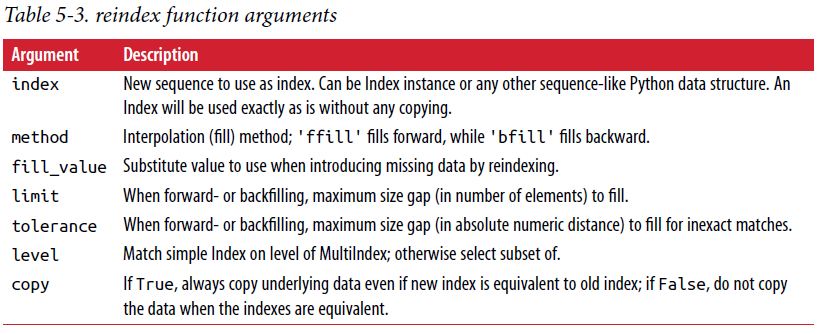

#### Dropping Entries from an Axis
* **drop** method will return a `new object` with the indicated value or values deleted from an axis
* if we pass arg `in-place=True`, it will not return new obect then
* Calling drop with a sequence of labels will drop values from the row labels (axis 0) (ByDefault axis 0 drop karega)
* You can drop values from the `columns` by passing `axis=1` or `axis='columns'`

#### Indexing, Selection, and Filtering
* Slicing with labels behaves differently than normal Python slicing in that the endpoint is `inclusive`:
```
In [125]: obj['b':'c']
Out[125]:
b 1.0
c 2.0
dtype: float64
```

#### Selection with loc and iloc
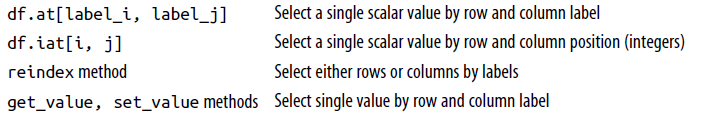

In [70]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [75]:
# df.at['row', 'col']
# by label
data.at['Utah', 'two']

9

In [76]:
# df.iat[row, col]
# by integer index

data.iat[2, 1]

9

# Integer Indexes
* if you have an axis index containing integers, data selection will always be `label-oriented`

#### Arithmetic and Data Alignment
* Nothing to note
#### Arithmetic methods with fill values
```
In [168]: df1
Out[168]:
a b c d
0 0.0 1.0 2.0 3.0
1 4.0 5.0 6.0 7.0
2 8.0 9.0 10.0 11.0
In [169]: df2
Out[169]:
a b c d e
0 0.0 1.0 2.0 3.0 4.0
1 5.0 NaN 7.0 8.0 9.0
2 10.0 11.0 12.0 13.0 14.0
3 15.0 16.0 17.0 18.0 19.0
```
* Adding these together results in NA values in the locations that don’t overlap:
```
In [170]: df1 + df2
Out[170]:
   a    b     c     d     e
0 0.0  2.0   4.0   6.0   NaN
1 9.0  NaN   13.0  15.0  NaN
2 18.0 20.0  22.0  24.0  NaN
3 NaN  NaN   NaN   NaN   NaN
```
* Using the `add` method on df1, I pass df2 and an argument to `fill_value`:
```
In [171]: df1.add(df2, fill_value=0)
Out[171]:
   a     b     c     d     e
0 0.0   2.0   4.0   6.0   4.0
1 9.0   5.0   13.0  15.0  9.0
2 18.0  20.0  22.0  24.0  14.0
3 15.0  16.0  17.0  18.0  19.0
```
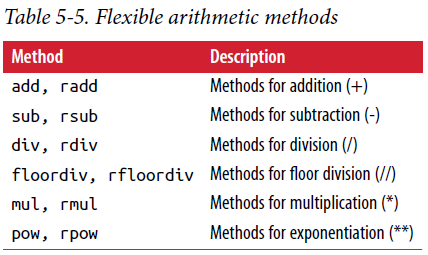
#### Operations between DataFrame and Series

In [80]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [81]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [83]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [84]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [86]:
series3 = frame['d']

series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [87]:
frame.sub(series3, axis='index')   # frame - series3

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


The axis number that you pass is the axis to match on. In this case we mean to match on the DataFrame’s row index (axis='index' or axis=0)

#### Function Application and Mapping

In [2]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.119076,-0.752326,1.623236
Ohio,0.055272,0.862858,0.882397
Texas,-1.125690,0.475908,0.468197
Oregon,0.618974,-0.351801,0.364188


In [3]:
np.abs(frame)

,b,d,e
Utah,0.119076,0.752326,1.623236
Ohio,0.055272,0.862858,0.882397
Texas,1.125690,0.475908,0.468197
Oregon,0.618974,0.351801,0.364188


In [4]:
frame

,b,d,e
Utah,-0.119076,-0.752326,1.623236
Ohio,0.055272,0.862858,0.882397
Texas,-1.125690,0.475908,0.468197
Oregon,0.618974,-0.351801,0.364188


In [5]:
f = lambda x: x.max() - x.min()

In [6]:
frame.apply(f)

b    1.744663
d    1.615184
e    1.259049
dtype: float64

In [8]:
print(0.618974--1.125690)
print(0.862858--0.752326)

1.7446640000000002
1.6151840000000002


* Here the function f, which computes the difference between the maximum and minimum of a `Series`, is invoked once on each column in frame. **The result is a Series having the columns of frame as its index**.
* If you pass **axis='columns'** to apply, the function will be invoked once per `row` instead:

In [9]:
frame.apply(f, axis='columns')   # row wise min and max

Utah      2.375562
Ohio      0.827124
Texas     1.601598
Oregon    0.970775
dtype: float64

In [10]:
print(1.623236--0.752326)

2.375562


In [11]:
# The function passed to apply need not return a scalar value; it can also return a Series with multiple values:

In [14]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [15]:
frame.apply(f)

,b,d,e
min,-1.125690,-0.752326,0.364188
max,0.618974,0.862858,1.623236


* to compute a formatted string from each floating-point value in frame. You can do this with apply map:

In [16]:
format = lambda x: '%.2f' % x

In [17]:
frame.applymap(format)

,b,d,e
Utah,-0.12,-0.75,1.62
Ohio,0.06,0.86,0.88
Texas,-1.13,0.48,0.47
Oregon,0.62,-0.35,0.36


The reason for the name applymap is that Series has a map method for applying an element-wise function:

In [18]:
frame['e'].map(format)

Utah      1.62
Ohio      0.88
Texas     0.47
Oregon    0.36
Name: e, dtype: object

#### Sorting and Ranking
* To sort lexicographically by row or column index, use the `sort_index` method, which returns a `new, sorted object`:

In [2]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [3]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

With a DataFrame, you can sort by index on either axis:

In [4]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),index=['three', 'one'],columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [5]:
frame.sort_index()  # by default row wise sort kar rha hai means axis 0

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [6]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [7]:
# The data is sorted in ascending order by default, but can be sorted in descending order, too:

frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its values, use its `sort_values` method:

In [8]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [9]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

Any missing values are **sorted to the end of the Series by default**:

In [10]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [11]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

When sorting a DataFrame, you can use the data in one or more columns as the sort keys. To do so, pass one or more column names to the `by` option of `sort_values`:

In [12]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [13]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [14]:
# To sort by multiple columns, pass a list of names:

frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


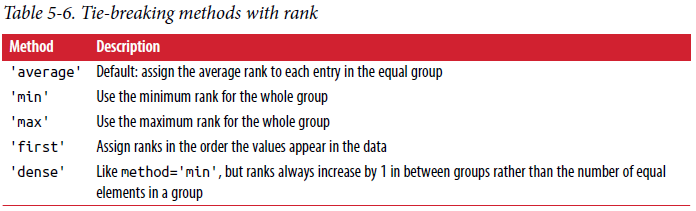
* By default, **equal values are assigned a rank that is the average of the ranks of those values**.
* The rank methods for Series and DataFrame are the place to look; by default rank breaks ties by assigning each group the mean rank:

In [15]:
# Ranking

obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [ ]:
# Default ranking or average ranking

# Unsorted     Sorted    Ranking    default Ranking
# 0    7       1   -5       1              1
# 1   -5       5    0       2              2
# 2    7       4    2       3              3
# 3    4       3    4       4              4.5         ( (4+5) / 2 = 4.5 )
# 4    2       6    4       5              4.5         
# 5    0       0    7       6              6.5         ( (6+7) / 2 = 6.5 )
# 6    4       2    7       7              6.5

In [21]:
print(obj.rank())

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64


###### first
* first: ranks assigned in order they appear in the array
* Ranks can also be assigned according to the order in which they’re observed in the data:

In [22]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

###### max
* max: highest rank in the group
* You can rank in descending order, too:

In [26]:
# max but ascending True

# Unsorted     Sorted    Ranking  max ranking
# 0    7       1   -5       1       1
# 1   -5       5    0       2       2
# 2    7       4    2       3       3
# 3    4       3    4       4       5
# 4    2       6    4       5       5
# 5    0       0    7       6       7
# 6    4       2    7       7       7

# Assign tie values the maximum rank in the group
obj.rank(method='max')
# obj.rank(ascending=False, method='max')

0    7.0
1    1.0
2    7.0
3    5.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [27]:
# max but ascending False

# Unsorted     Sorted    Ranking  max ranking
# 0    7       1   -5       7       7
# 1   -5       5    0       6       6
# 2    7       4    2       5       5
# 3    4       3    4       4       4
# 4    2       6    4       3       4
# 5    0       0    7       2       2
# 6    4       2    7       1       2


obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [28]:
# DataFrame can compute ranks over the rows or the columns:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [30]:
#       b    a     c
# 0    4.3   0   -2.0
# 1    7.0   1    5.0
# 2   -3.0   0    8.0
# 3    2.0   1   -2.5



frame.rank()

,b,a,c
0,3.0,1.5,2.0
1,4.0,3.5,3.0
2,1.0,1.5,4.0
3,2.0,3.5,1.0


In [33]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


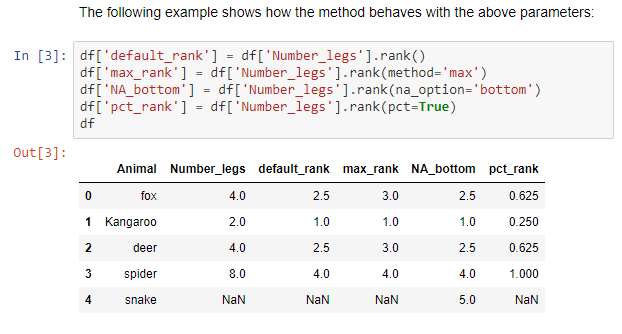
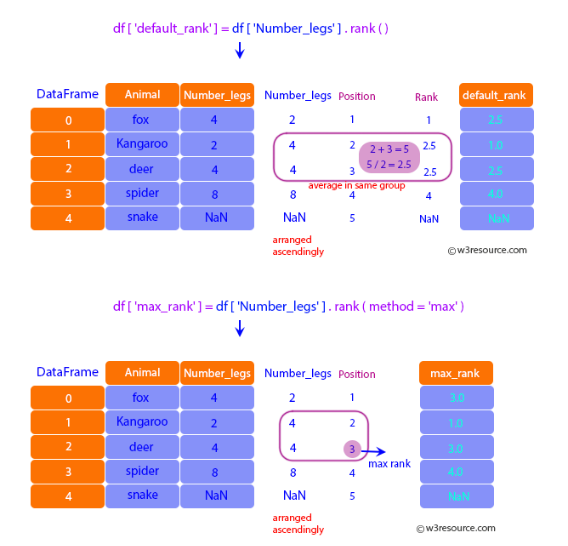
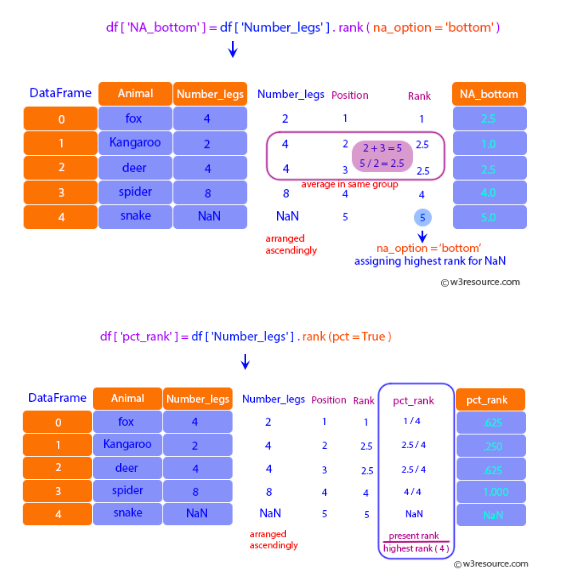

#### Axis Indexes with Duplicate Labels
* Nothing to note

## 5.3 Summarizing and Computing Descriptive Statistics

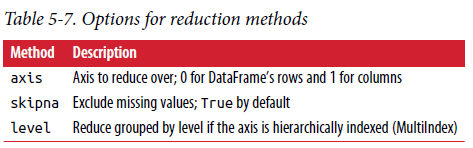
* pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of **reductions** or **summary statistics**, methods that `extract a single value` (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame. Compared with the similar methods found on NumPy arrays, they have built-in handling for missing data. Consider a small DataFrame:

In [35]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [36]:
# Calling DataFrame’s sum method returns a Series containing column sums:

df.sum()

one    9.25
two   -5.80
dtype: float64

In [37]:
# Passing axis='columns' or axis=1 sums across the columns instead:

df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [38]:
# NA values are excluded unless the entire slice (row or column in this case) is NA.
# This can be disabled with the skipna option:

df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [39]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Some methods, like **idxmin** and **idxmax**, return indirect statistics like the `index value where the minimum or maximum values` are attained:

In [40]:
df.idxmax()

one    b
two    d
dtype: object

Other methods are **accumulations**:

In [41]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


Another type of method is `neither a reduction nor an accumulation`. **describe** is one such example, `producing multiple summary statistics in one shot`:

In [42]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


On non-numeric data, describe produces alternative summary statistics:

In [43]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [44]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

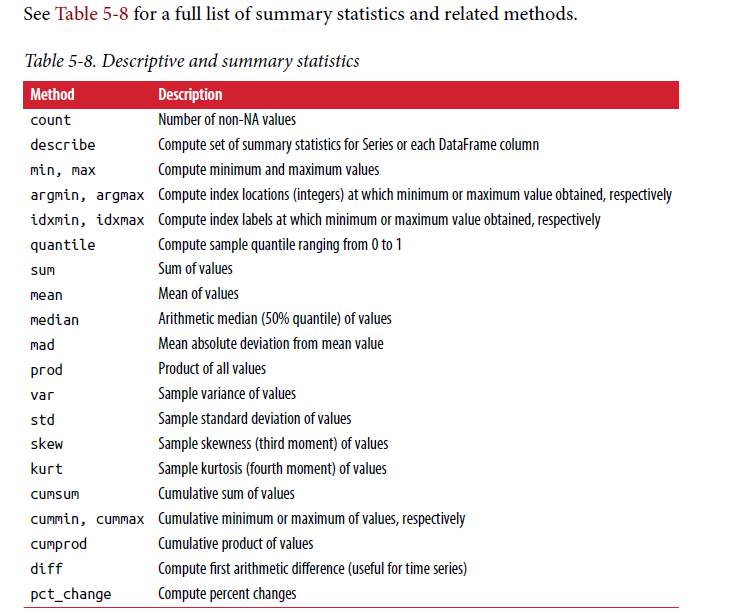

#### Correlation and Covariance

In [45]:
import pandas_datareader.data as web

In [48]:
all_data = { ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG'] }

In [51]:
price = pd.DataFrame({ ticker: data['Adj Close'] for ticker, data in all_data.items() })

price.head(3)

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-02-08,22.092409,103.186661,45.088188,682.739990
2016-02-09,22.087757,100.821930,44.969563,678.109985
2016-02-10,21.920340,97.668968,45.361958,684.119995


In [52]:
volume = pd.DataFrame({ ticker: data['Volume'] for ticker, data in all_data.items() })

volume.head(3)

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-02-08,216085600.0,7364000.0,59290500.0,4247400
2016-02-09,177324800.0,5957200.0,46740500.0,3608900
2016-02-10,169374400.0,6469100.0,38237000.0,2638000


In [53]:
# I now compute percent changes of the prices:

returns = price.pct_change()

returns.tail(3)

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-02-03,-0.007778,-0.002679,0.014571,0.073961
2021-02-04,0.025758,0.015950,-0.004074,-0.003720
2021-02-05,-0.003098,0.006363,0.000785,0.017276


The **corr** `method of Series` computes the correlation of the overlapping, non-NA,
aligned-by-index values in two Series. Relatedly, `cov` computes the covariance:

In [54]:
returns['MSFT'].corr(returns['IBM'])

0.5403640423791636

In [55]:
returns['MSFT'].cov(returns['IBM'])

0.0001543875024441922

`DataFrame’s` corr and cov methods, on the other hand, return a full correlation or
covariance `matrix as a DataFrame`, respectively:

In [56]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.454488,0.709232,0.650516
IBM,0.454488,1.000000,0.540364,0.505685
MSFT,0.709232,0.540364,1.000000,0.778162
GOOG,0.650516,0.505685,0.778162,1.000000


In [57]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000358,0.000142,0.000233,0.000205
IBM,0.000142,0.000271,0.000154,0.000139
MSFT,0.000233,0.000154,0.000301,0.000225
GOOG,0.000205,0.000139,0.000225,0.000278


Using DataFrame’s corrwith method, you can compute pairwise correlations between a DataFrame’s columns or rows with another Series or DataFrame. Passing a Series returns a Series with the correlation value computed for each column:

In [58]:
returns.corrwith(returns.IBM)

AAPL    0.454488
IBM     1.000000
MSFT    0.540364
GOOG    0.505685
dtype: float64

Passing axis='columns' does things row-by-row instead. In all cases, the data points
are aligned by label before the correlation is computed.

#### Unique Values, Value Counts, and Membership
* Another class of related methods extracts information about the values contained in a `one-dimensional Series`. To illustrate these, consider this example:

In [60]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [61]:
# unique()
# The first function is unique, which gives you an array of the unique values in a Series:

uniques = obj.unique()

uniques

array(['c', 'a', 'd', 'b'], dtype=object)

The unique values are not necessarily returned in sorted order, but could be sorted
after the fact if needed (**uniques.sort()**). Relatedly, **value_counts** computes a Series containing value frequencies:

In [62]:
# value_counts()
# konsi value kitni baar hai

obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

* The Series is **sorted by value** in **descending order** as a convenience. 
* value_counts is also available as a top-level pandas method that can be used with any array or sequence:

In [64]:
pd.value_counts(obj.values, sort=False)

d    1
c    3
b    2
a    3
dtype: int64

In [65]:
pd.value_counts(obj, sort=True)

a    3
c    3
b    2
d    1
dtype: int64

In [66]:
pd.value_counts(obj.values, sort=True)

a    3
c    3
b    2
d    1
dtype: int64

**isin** performs a vectorized set membership check and can be useful in filtering a dataset down to a subset of values in a Series or column in a DataFrame:

In [67]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [68]:
mask = obj.isin(['b', 'c'])

mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [69]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

Related to isin is the **Index.get_indexer** method, which `gives you an index array from an array of possibly non-distinct values into another array of distinct values`:

In [70]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

to_match

0    c
1    a
2    b
3    b
4    c
5    a
dtype: object

In [72]:
unique_vals = pd.Series(['c', 'b', 'a'])

unique_vals

0    c
1    b
2    a
dtype: object

In [73]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int32)

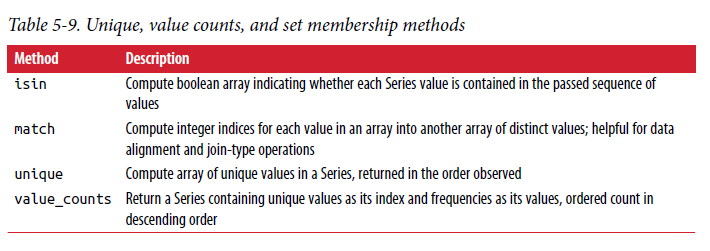

# Chapter 6: Data Loading, Storage, and File Formats (23 pages)

## 6.1 Reading and Writing Data in Text Format
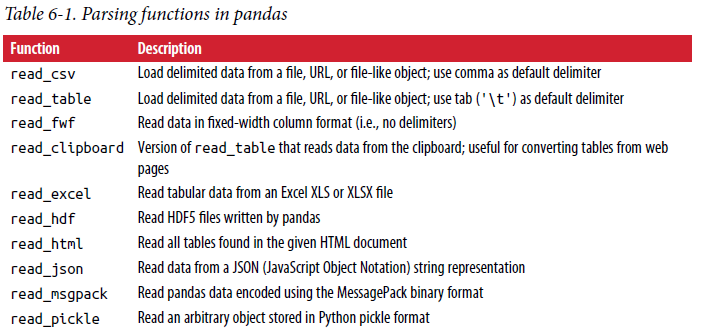
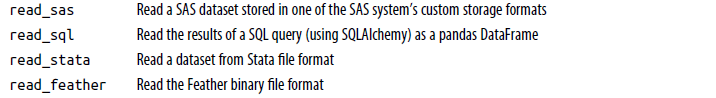
* These functions are meant to `convert text data into a DataFrame`. The `optional arguments` for these functions may fall into a few categories:
###### Indexing
* Can treat one or more columns as the returned DataFrame, and whether to get column names from the file, the user, or not at all.
###### Type inference and data conversion
* This includes the `user-defined value conversions` and `custom list of missing value markers`.
###### Datetime parsing
* Includes `combining capability`, including `combining date and time information` spread over `multiple columns into a single column` in the result.
###### Iterating
* Support for iterating over chunks of very large files.
###### Unclean data issues
* `Skipping rows or a footer`, `comments`, or `other minor things` like numeric data with thousands separated by commas.

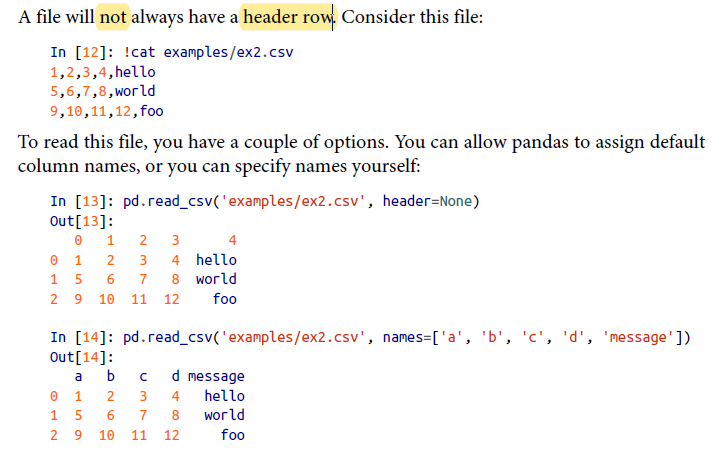